In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Beta_Secretase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.00,active
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.00,active
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.00,active
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.00,intermediate
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.00,intermediate
...,...,...,...,...
7057,CHEMBL4565226,CC(Cc1cc2ccccc2nc1N)C(=O)NC[C@@]12CCCO[C@@H]1C...,33113.11,inactive
7058,CHEMBL4520156,Nc1nc2ccccc2cc1CCC(=O)N1CC[C@H]2OCCC[C@@]2(Cc2...,85113.80,inactive
7059,CHEMBL4585673,Nc1nc2ccccc2cc1CCC(=O)NC[C@@]12CCCO[C@@H]1CCOC2,28840.32,inactive
7060,CHEMBL4546115,COc1ccc2c(c1)[C@@H](O)[C@@]1(CCN(C(=O)CCc3cc4c...,54954.09,inactive


In [3]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [4]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [5]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL406146,413.00,active,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...
1,CHEMBL78946,2.00,active,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...
2,CHEMBL324109,460.00,active,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...
3,CHEMBL114147,9000.00,intermediate,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...
4,CHEMBL419949,5600.00,intermediate,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...
...,...,...,...,...
7057,CHEMBL4565226,33113.11,inactive,CC(Cc1cc2ccccc2nc1N)C(=O)NC[C@@]12CCCO[C@@H]1C...
7058,CHEMBL4520156,85113.80,inactive,Nc1nc2ccccc2cc1CCC(=O)N1CC[C@H]2OCCC[C@@]2(Cc2...
7059,CHEMBL4585673,28840.32,inactive,Nc1nc2ccccc2cc1CCC(=O)NC[C@@]12CCCO[C@@H]1CCOC2
7060,CHEMBL4546115,54954.09,inactive,COc1ccc2c(c1)[C@@H](O)[C@@]1(CCN(C(=O)CCc3cc4c...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [7]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [8]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,999.085,-1.4355,13.0,13.0
1,893.005,-1.7361,12.0,12.0
2,751.988,2.3535,8.0,9.0
3,737.895,1.9626,8.0,8.0
4,828.020,3.5739,8.0,8.0
...,...,...,...,...
7057,383.492,2.6975,2.0,5.0
7058,429.564,4.3900,1.0,4.0
7059,369.465,2.4515,2.0,5.0
7060,417.509,3.2666,2.0,5.0


In [9]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.00,active,999.085,-1.4355,13.0,13.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.00,active,893.005,-1.7361,12.0,12.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.00,active,751.988,2.3535,8.0,9.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.00,intermediate,737.895,1.9626,8.0,8.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.00,intermediate,828.020,3.5739,8.0,8.0
...,...,...,...,...,...,...,...,...
7057,CHEMBL4565226,CC(Cc1cc2ccccc2nc1N)C(=O)NC[C@@]12CCCO[C@@H]1C...,33113.11,inactive,383.492,2.6975,2.0,5.0
7058,CHEMBL4520156,Nc1nc2ccccc2cc1CCC(=O)N1CC[C@H]2OCCC[C@@]2(Cc2...,85113.80,inactive,429.564,4.3900,1.0,4.0
7059,CHEMBL4585673,Nc1nc2ccccc2cc1CCC(=O)NC[C@@]12CCCO[C@@H]1CCOC2,28840.32,inactive,369.465,2.4515,2.0,5.0
7060,CHEMBL4546115,COc1ccc2c(c1)[C@@H](O)[C@@]1(CCN(C(=O)CCc3cc4c...,54954.09,inactive,417.509,3.2666,2.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [10]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [11]:
df_combined.standard_value.describe()

count    7.062000e+03
mean     4.166184e+04
std      1.126615e+06
min      2.000000e-04
25%      2.900000e+01
50%      2.500000e+02
75%      3.168070e+03
max      8.600000e+07
Name: standard_value, dtype: float64

In [12]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [13]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,413.00
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,2.00
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,460.00
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,9000.00
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5600.00
...,...,...,...,...,...,...,...,...
7057,CHEMBL4565226,CC(Cc1cc2ccccc2nc1N)C(=O)NC[C@@]12CCCO[C@@H]1C...,inactive,383.492,2.6975,2.0,5.0,33113.11
7058,CHEMBL4520156,Nc1nc2ccccc2cc1CCC(=O)N1CC[C@H]2OCCC[C@@]2(Cc2...,inactive,429.564,4.3900,1.0,4.0,85113.80
7059,CHEMBL4585673,Nc1nc2ccccc2cc1CCC(=O)NC[C@@]12CCCO[C@@H]1CCOC2,inactive,369.465,2.4515,2.0,5.0,28840.32
7060,CHEMBL4546115,COc1ccc2c(c1)[C@@H](O)[C@@]1(CCN(C(=O)CCc3cc4c...,inactive,417.509,3.2666,2.0,5.0,54954.09


In [14]:
df_norm.standard_value_norm.describe()

count    7.062000e+03
mean     4.166184e+04
std      1.126615e+06
min      2.000000e-04
25%      2.900000e+01
50%      2.500000e+02
75%      3.168070e+03
max      8.600000e+07
Name: standard_value_norm, dtype: float64

In [15]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5.251812
...,...,...,...,...,...,...,...,...
7057,CHEMBL4565226,CC(Cc1cc2ccccc2nc1N)C(=O)NC[C@@]12CCCO[C@@H]1C...,inactive,383.492,2.6975,2.0,5.0,4.480000
7058,CHEMBL4520156,Nc1nc2ccccc2cc1CCC(=O)N1CC[C@H]2OCCC[C@@]2(Cc2...,inactive,429.564,4.3900,1.0,4.0,4.070000
7059,CHEMBL4585673,Nc1nc2ccccc2cc1CCC(=O)NC[C@@]12CCCO[C@@H]1CCOC2,inactive,369.465,2.4515,2.0,5.0,4.540000
7060,CHEMBL4546115,COc1ccc2c(c1)[C@@H](O)[C@@]1(CCN(C(=O)CCc3cc4c...,inactive,417.509,3.2666,2.0,5.0,4.260000


In [16]:
df_final.pIC50.describe()

count    7062.000000
mean        6.489196
std         1.389928
min         1.065502
25%         5.499205
50%         6.602060
75%         7.537602
max        12.698970
Name: pIC50, dtype: float64

In [17]:
df_final.to_csv('Beta_Secretase_04_bioactivity_data_3class_pIC50.csv')

In [18]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
5,CHEMBL116826,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,inactive,767.987,1.3690,8.0,9.0,4.468521
6,CHEMBL143239,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,active,717.722,4.3196,7.0,7.0,7.698970
...,...,...,...,...,...,...,...,...
7057,CHEMBL4565226,CC(Cc1cc2ccccc2nc1N)C(=O)NC[C@@]12CCCO[C@@H]1C...,inactive,383.492,2.6975,2.0,5.0,4.480000
7058,CHEMBL4520156,Nc1nc2ccccc2cc1CCC(=O)N1CC[C@H]2OCCC[C@@]2(Cc2...,inactive,429.564,4.3900,1.0,4.0,4.070000
7059,CHEMBL4585673,Nc1nc2ccccc2cc1CCC(=O)NC[C@@]12CCCO[C@@H]1CCOC2,inactive,369.465,2.4515,2.0,5.0,4.540000
7060,CHEMBL4546115,COc1ccc2c(c1)[C@@H](O)[C@@]1(CCN(C(=O)CCc3cc4c...,inactive,417.509,3.2666,2.0,5.0,4.260000


In [19]:
df_2class.to_csv('Beta_Secretase_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [20]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

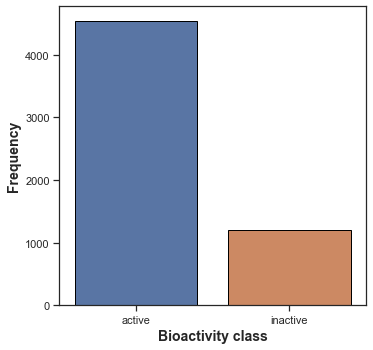

In [21]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

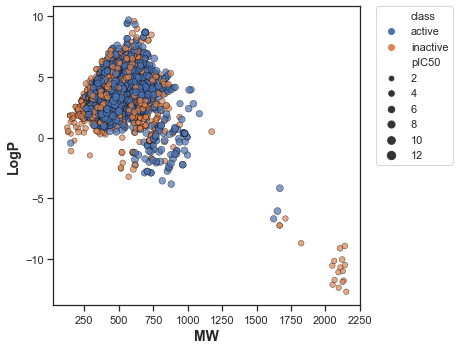

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

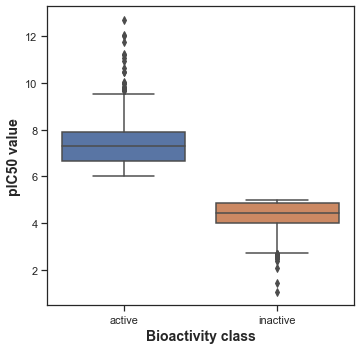

In [23]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [24]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [25]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


## Molecular Weight

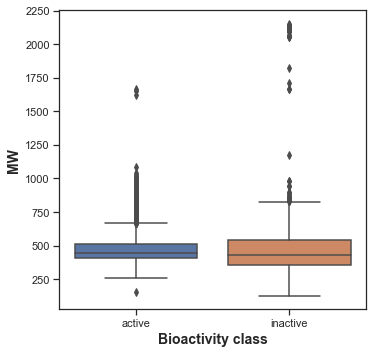

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [27]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2372118.0,8.563718e-12,0.05,Different distribution (reject H0)


## LogP

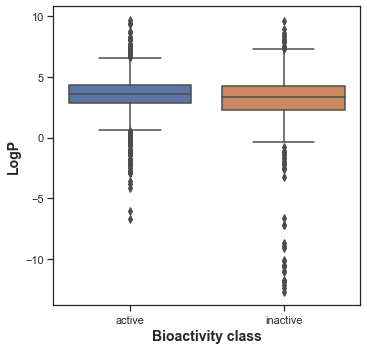

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [29]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2397983.5,2.468324e-10,0.05,Different distribution (reject H0)


## Num H Donors

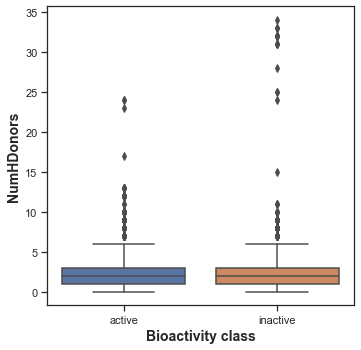

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [31]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2554752.0,0.000492,0.05,Different distribution (reject H0)


## Num H Acceptors

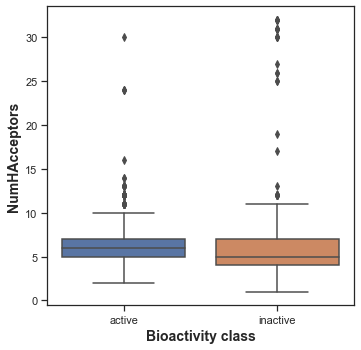

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [33]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2375552.0,5.697429e-12,0.05,Different distribution (reject H0)
